In [1]:
import pandas as pd
import numpy as np

In [2]:
p1 = pd.read_csv('../data/problem1.csv', index_col=0)
p1

,StockCode,SectorCode,SectorWeightRank,WeightInIndex,WeightInSectorPortofolio
0,601398.SH,银行,2.0,0.8439,0.055675
1,601628.SH,非银金融,1.0,0.3598,0.023636
2,601166.SH,银行,2.0,1.8291,0.120673
3,601318.SH,非银金融,1.0,6.1045,0.401013
4,601998.SH,银行,2.0,0.1206,0.007956
...,...,...,...,...,...
116,002001.SZ,医药生物,4.0,0.2663,0.032282
117,002007.SZ,医药生物,4.0,0.3219,0.039022
118,002008.SZ,电子,5.0,0.1958,0.028176
119,002044.SZ,医药生物,4.0,0.2376,0.028803


In [24]:
stockCodes = p1['StockCode'].tolist()
sqlCodesList = '(' + ','.join(list(map(lambda x: '\'' + x + '\'', stockCodes))) + ')'
sqlCodesList

"('601398.SH','601628.SH','601166.SH','601318.SH','601998.SH','601328.SH','002142.SZ','601009.SH','002304.SZ','601601.SH','002236.SZ','002252.SZ','002241.SZ','601901.SH','601878.SH','002673.SZ','601198.SH','601288.SH','601838.SH','601997.SH','601229.SH','601162.SH','601788.SH','002294.SZ','600999.SH','300003.SZ','300015.SZ','601688.SH','002411.SZ','002415.SZ','002422.SZ','002456.SZ','601377.SH','601336.SH','002475.SZ','601818.SH','300122.SZ','600998.SH','600958.SH','300136.SZ','300142.SZ','600926.SH','600919.SH','000166.SZ','002736.SZ','601211.SH','603156.SH','601555.SH','300347.SZ','603288.SH','002773.SZ','601169.SH','601939.SH','603986.SH','603160.SH','300433.SZ','300408.SZ','601881.SH','002841.SZ','603501.SH','601108.SH','002939.SZ','002945.SZ','002958.SZ','601577.SH','600928.SH','002916.SZ','601066.SH','601236.SH','603259.SH','601319.SH','002938.SZ','601138.SH','000001.SZ','000413.SZ','000415.SZ','000423.SZ','000538.SZ','000568.SZ','000596.SZ','000627.SZ','000661.SZ','000725.SZ','0

In [4]:
# config FileSync database
import os
import configparser
import pandas as pd
import sqlalchemy as sa

from sqlalchemy.ext.declarative import declarative_base

In [5]:
import cx_Oracle   
cx_Oracle.init_oracle_client(lib_dir=r"../FileSync/instantclient_19_8")

conn = cx_Oracle.connect('student2001212376', 'student2001212376', '219.223.208.52/orcl')

cursor = conn.cursor()

In [27]:
query = f'''
SELECT S_INFO_WINDCODE, TRADE_DT, S_DQ_CLOSE
FROM FILESYNC.AShareEODPrices
WHERE (TRADE_DT BETWEEN 20200430 AND 20200630)
AND S_INFO_WINDCODE IN {sqlCodesList}
'''
cursor.execute(query)
data = cursor.fetchall()
print(data)

[('002236.SZ', '20200520', 16.48), ('600061.SH', '20200521', 12.12), ('600183.SH', '20200521', 28.2), ('601162.SH', '20200520', 5.93), ('000783.SZ', '20200520', 6.36), ('000100.SZ', '20200528', 4.94), ('600276.SH', '20200528', 78.5), ('600369.SH', '20200528', 4.39), ('002304.SZ', '20200528', 104.25), ('000001.SZ', '20200528', 13.07), ('002411.SZ', '20200528', 6.91), ('002001.SZ', '20200529', 25.3), ('002007.SZ', '20200529', 41.18), ('002008.SZ', '20200529', 30.42), ('000776.SZ', '20200529', 13.18), ('600000.SH', '20200529', 10.57), ('600016.SH', '20200529', 5.69), ('600036.SH', '20200529', 33.82), ('600061.SH', '20200529', 11.92), ('600535.SH', '20200526', 14.64), ('600036.SH', '20200525', 33.09), ('000413.SZ', '20200525', 2.7), ('600809.SH', '20200525', 121.95), ('600816.SH', '20200525', 2.5), ('600016.SH', '20200526', 5.7), ('002007.SZ', '20200525', 41.18), ('000776.SZ', '20200526', 13.22), ('601878.SH', '20200526', 9.52), ('300015.SZ', '20200512', 46.32), ('603259.SH', '20200514', 1

In [30]:
prices = pd.DataFrame(data)
prices.columns = ['StockCode', 'date', 'price']
prices

,StockCode,date,price
0,002236.SZ,20200520,16.48
1,600061.SH,20200521,12.12
2,600183.SH,20200521,28.20
3,601162.SH,20200520,5.93
4,000783.SZ,20200520,6.36
...,...,...,...
4714,600705.SH,20200430,3.93
4715,600535.SH,20200506,14.40
4716,600000.SH,20200430,10.63
4717,600085.SH,20200430,25.68


In [132]:
allStocks = prices.pivot_table(index='date', columns='StockCode')['price']
allStocks

StockCode,000001.SZ,000100.SZ,000166.SZ,000413.SZ,000415.SZ,000423.SZ,000538.SZ,000568.SZ,000596.SZ,000627.SZ,...,601939.SH,601988.SH,601997.SH,601998.SH,603156.SH,603160.SH,603259.SH,603288.SH,603501.SH,603986.SH
date,,,,,,,,,,,,,,,,,,,,,
20200430,13.93,4.64,4.37,2.78,2.74,31.00,90.32,79.17,134.89,5.51,...,6.43,3.48,7.90,5.20,26.55,236.25,101.77,122.93,194.48,277.82
20200506,13.77,4.80,4.44,2.81,2.82,31.20,91.30,79.03,134.12,5.52,...,6.34,3.45,7.88,5.15,27.06,242.00,100.24,127.19,209.41,305.60
20200507,13.69,4.71,4.42,2.74,2.84,30.83,90.45,80.30,136.50,5.53,...,6.31,3.44,7.85,5.11,26.95,235.98,101.29,107.71,208.19,226.00
20200508,13.95,4.74,4.48,2.74,2.86,30.71,91.49,81.64,140.24,5.59,...,6.35,3.46,7.92,5.15,27.50,241.13,103.60,108.72,208.97,221.01
20200511,14.00,4.84,4.49,2.72,2.84,30.98,89.20,82.80,145.88,5.59,...,6.39,3.46,7.90,5.13,27.34,243.39,102.80,107.34,206.69,220.38
20200512,13.79,4.83,4.50,2.66,2.80,32.02,89.12,84.12,147.70,5.54,...,6.35,3.44,7.84,5.10,27.35,238.00,106.10,112.47,207.05,217.89
20200513,13.63,4.89,4.53,2.90,2.82,31.74,90.00,88.66,149.11,5.52,...,6.38,3.46,7.81,5.12,28.39,238.96,110.21,113.18,208.47,219.00
20200514,13.30,4.99,4.48,2.84,2.77,32.12,88.98,87.80,150.78,5.46,...,6.32,3.45,7.68,5.07,28.90,234.00,110.22,110.32,207.02,214.73
20200515,13.23,5.19,4.46,2.85,2.75,32.48,87.90,87.56,148.19,5.40,...,6.31,3.45,7.67,5.08,28.68,240.36,109.33,110.40,214.90,230.00


In [59]:
# prices.to_csv('../data/prices.csv')
# allStocks.to_csv('../data/allStocks.csv')

In [133]:
def createPortofolio(name, code):
    sectorCol= 'SectorCode' + code
    sectorStocks = p1[p1['SectorCode'] == name]

    allStocks[sectorCol] = 0
    for i, row in enumerate(sectorStocks.iterrows()):
        stockCode = row[1]['StockCode']
        weightInSector = row[1]['WeightInSectorPortofolio']
        allStocks[sectorCol] += allStocks[stockCode] * weightInSector

In [134]:
sectorCodePair = [['非银金融', '1'],
                  ['银行', '2'],
                  ['食品饮料', '3'],
                  ['医药生物', '4'],
                  ['电子', '5']]

for [sec, code] in sectorCodePair:
    createPortofolio(name = sec, code = code)

In [184]:
allStocks.index.name = 'TradeDate'
portFolioStocks = allStocks[['SectorCode1', 
                             'SectorCode2', 
                             'SectorCode3', 
                             'SectorCode4', 
                             'SectorCode5']].reset_index().set_index('TradeDate')

portFolioStocks

StockCode,SectorCode1,SectorCode2,SectorCode3,SectorCode4,SectorCode5
TradeDate,,,,,
20200430,40.119661,13.793943,630.110691,104.841940,59.550782
20200506,39.824964,13.628664,646.637517,107.434874,62.677697
20200507,39.517440,13.548488,651.539321,107.438915,57.599412
20200508,39.516398,13.724289,653.173909,107.930575,57.917715
20200511,39.856074,13.717546,656.677434,106.542503,57.689709
20200512,39.813351,13.582606,661.920935,108.853773,57.646752
20200513,39.586189,13.561998,664.402854,110.662578,56.087499
20200514,38.981923,13.357152,659.823230,111.003727,55.429483
20200515,38.973185,13.339623,653.149415,109.941858,56.840118


In [194]:
portFolioStocksReturn = portFolioStocks.pct_change(1).fillna(method='bfill')
portFolioStocksReturn.index = pd.to_datetime(portFolioStocksReturn.index)
portFolioStocksReturn

StockCode,SectorCode1,SectorCode2,SectorCode3,SectorCode4,SectorCode5
TradeDate,,,,,
2020-04-30,-0.007345,-0.011982,0.026228,0.024732,0.052508
2020-05-06,-0.007345,-0.011982,0.026228,0.024732,0.052508
2020-05-07,-0.007722,-0.005883,0.007580,0.000038,-0.081022
2020-05-08,-0.000026,0.012976,0.002509,0.004576,0.005526
2020-05-11,0.008596,-0.000491,0.005364,-0.012861,-0.003937
2020-05-12,-0.001072,-0.009837,0.007985,0.021693,-0.000745
2020-05-13,-0.005706,-0.001517,0.003750,0.016617,-0.027048
2020-05-14,-0.015265,-0.015104,-0.006893,0.003083,-0.011732
2020-05-15,-0.000224,-0.001312,-0.010115,-0.009566,0.025449


<AxesSubplot:xlabel='TradeDate', ylabel='return'>

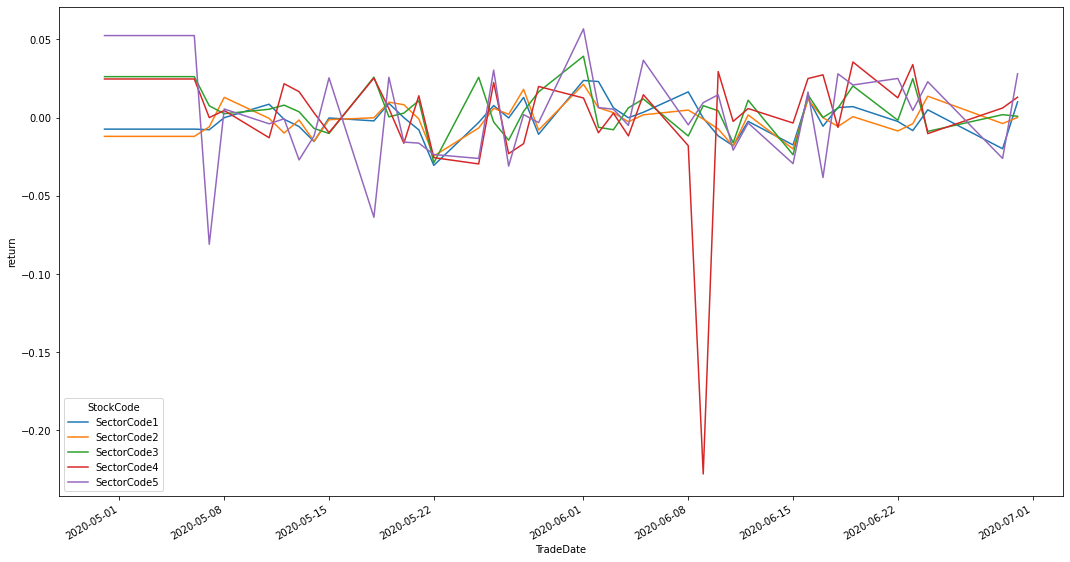

In [205]:
plot = portFolioStocksReturn.plot(ylabel='return', figsize=(18, 10))
plot

In [206]:
fig = plot.get_figure()
fig.savefig("../img/problem2.png")

In [ ]:
portFolioStocksReturn.to_csv('../data/problem2.csv')